In [1]:
import os
import getpass

from langchain_ollama import ChatOllama

llm = ChatOllama(model='llama3.2', temperature=0)

# from langchain_anthropic import ChatAnthropic

# def _set_env(var: str):
#     if not os.environ.get(var):
#         os.environ[var] = getpass.getpass(f"{var}: ")


# _set_env("ANTHROPIC_API_KEY")

# llm = ChatAnthropic(model="claude-3-5-sonnet-latest")

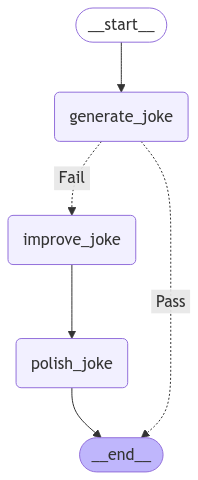

Initial joke:
Why did the cat join a band?

Because it wanted to be the purr-cussionist.

--- --- ---

Improved joke:
Here's an attempt at adding more wordplay:

Why did the cat join a band?

Because it was a mew-sical genius and wanted to be the purr-cussionist – after all, it had a paws-itive beat!

Or, alternatively:

Why did the cat join a band?

Because it wanted to be the purr-cussionist – but first, it had to claw its way to the top of the music scene!

--- --- ---

Final joke:
Here's an attempt at adding a surprising twist to your jokes:

Why did the cat join a band?

Because it was a mew-sical genius and wanted to be the purr-cussionist – after all, it had a paws-itive beat!

Or, alternatively:

Why did the cat join a band?

Because it wanted to be the purr-cussionist – but little did anyone know, its music was actually a government-funded experiment to create a mind-control device that would make humans dance like cats. The cat's paws-itive beat was just the beginning of a fe

In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


# Graph state
class State(TypedDict):
    topic: str
    joke: str
    improved_joke: str
    final_joke: str


# Nodes
def generate_joke(state: State):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a short joke about {state['topic']}")
    return {"joke": msg.content}


def check_punchline(state: State):
    """Gate function to check if the joke has a punchline"""

    # Simple check - does the joke contain "?" or "!"
    if "?" in state["joke"] or "!" in state["joke"]:
        return "Fail"
    return "Pass"


def improve_joke(state: State):
    """Second LLM call to improve the joke"""

    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {state['joke']}")
    return {"improved_joke": msg.content}


def polish_joke(state: State):
    """Third LLM call for final polish"""

    msg = llm.invoke(f"Add a surprising twist to this joke: {state['improved_joke']}")
    return {"final_joke": msg.content}


# Build workflow
workflow = StateGraph(State)

# Add nodes
workflow.add_node("generate_joke", generate_joke)
workflow.add_node("improve_joke", improve_joke)
workflow.add_node("polish_joke", polish_joke)

# Add edges to connect nodes
workflow.add_edge(START, "generate_joke")
workflow.add_conditional_edges(
    "generate_joke", check_punchline, {"Fail": "improve_joke", "Pass": END}
)
workflow.add_edge("improve_joke", "polish_joke")
workflow.add_edge("polish_joke", END)

# Compile
chain = workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

# Invoke
state = chain.invoke({"topic": "cats"})
print("Initial joke:")
print(state["joke"])
print("\n--- --- ---\n")
if "improved_joke" in state:
    print("Improved joke:")
    print(state["improved_joke"])
    print("\n--- --- ---\n")

    print("Final joke:")
    print(state["final_joke"])
else:
    print("Joke failed quality gate - no punchline detected!")